In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gdown=="4.6.3"

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0


In [2]:
!gdown "1UFTmcJAF7HHP-rGUQSkVth6q6V6J_fH-"

Downloading...
From: https://drive.google.com/uc?id=1UFTmcJAF7HHP-rGUQSkVth6q6V6J_fH-
To: /content/Twitter_Data.csv
100% 20.9M/20.9M [00:00<00:00, 67.9MB/s]


In [3]:
df = pd.read_csv("Twitter_Data.csv")
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
df = df.rename(columns={'clean_text': 'talks', 'category': 'Sentiment'})
df

,talks,Sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [5]:
df.isnull().sum()

talks        4
Sentiment    7
dtype: int64

In [8]:
df.dropna(inplace=True  )

In [9]:
df.isnull().sum()

talks        0
Sentiment    0
dtype: int64

In [10]:
df["Sentiment"] = df["Sentiment"].replace({
    -1 : "Negative",
    0 : 'Neutral',
    1 : "Positive"
    })

In [11]:
df

,talks,Sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


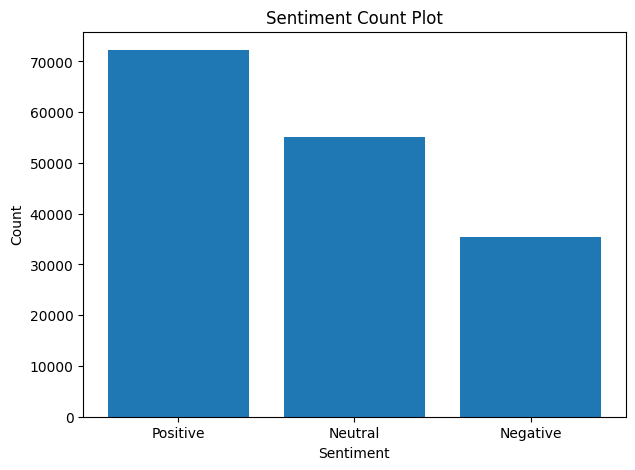

In [12]:
sentiment_counts =df['Sentiment'].value_counts()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the count plot using Matplotlib
ax.bar(sentiment_counts.index, sentiment_counts.values)

# Customize the plot
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Count Plot')

# Show the plot
plt.show()

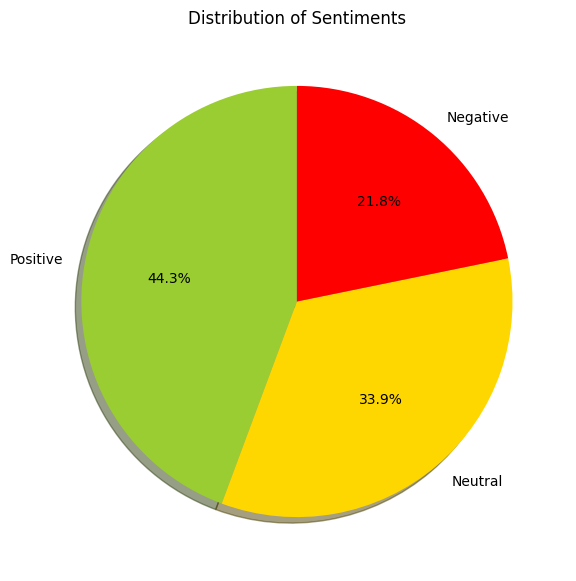

In [13]:
tags = df['Sentiment'].value_counts()


# Colors for the pie chart wedges
colors = ("yellowgreen", "gold", "red")

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(tags, labels=tags.index, autopct='%1.1f%%', shadow=True,
        colors=colors, startangle=90)

# Set the title
plt.title('Distribution of Sentiments')

# Show the pie chart
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer



# Step 3: Vectorize Text Data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Choose the number of features as needed
X = tfidf_vectorizer.fit_transform(df['talks']).toarray()
y = df['Sentiment']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.8380594439117929
Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.63      0.72     28357
     Neutral       0.77      0.97      0.86     44144
    Positive       0.90      0.84      0.87     57874

    accuracy                           0.84    130375
   macro avg       0.84      0.81      0.82    130375
weighted avg       0.85      0.84      0.83    130375

Confusion Matrix:
[[17788  6221  4348]
 [  465 42891   788]
 [ 2593  6698 48583]]


In [33]:
new_text = ['answer who among these the most powerful world leader today trump putin modi may']

new_text_vectorized = tfidf_vectorizer.transform(new_text).toarray()

predicted_label = model.predict(new_text_vectorized)

print("Predicted Label:", predicted_label)

Predicted Label: ['Positive']
